In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
from datetime import datetime
import json
import plotly.express as px
import numpy as np

from MCForecastTools import MCSimulation


%matplotlib inline

In [2]:
mls_data_path = "./MLS.csv"

In [3]:
mls_data_df = pd.read_csv(mls_data_path, infer_datetime_format=True)

#Previewing Data

mls_data_df.tail()

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
5086,York Region,287.0,970300.0,11.76,292.0,1112000.0,12.65,293.2,847300.0,12.73,271.3,704100.0,11.28,252.2,562700.0,6.91,2020-11-01
5087,York Region,289.5,978700.0,12.56,295.2,1124200.0,13.89,296.3,856200.0,13.66,270.4,701800.0,10.28,253.2,564900.0,6.84,2020-12-01
5088,York Region,294.9,997000.0,13.34,301.7,1148900.0,15.20,302.9,875300.0,14.78,272.6,707500.0,10.14,254.7,568200.0,5.86,2021-01-01
5089,York Region,309.9,1047700.0,17.16,318.6,1213300.0,20.23,322.6,932200.0,20.15,280.7,728500.0,11.04,260.2,580500.0,5.39,2021-02-01
5090,York Region,324.1,1095700.0,19.82,334.4,1273400.0,23.49,337.2,974400.0,22.48,294.0,763000.0,14.75,268.7,599500.0,6.00,2021-03-01


In [4]:
mls_data_df.count

<bound method DataFrame.count of                Location  CompIndex  CompBenchmark  CompYoYChange  \
0     Adjala-Tosorontio      143.7       510000.0          12.00   
1     Adjala-Tosorontio      140.8       499700.0          13.82   
2     Adjala-Tosorontio      142.7       506400.0          15.83   
3     Adjala-Tosorontio      138.4       491100.0          11.08   
4     Adjala-Tosorontio      145.4       516000.0          16.51   
...                 ...        ...            ...            ...   
5086        York Region      287.0       970300.0          11.76   
5087        York Region      289.5       978700.0          12.56   
5088        York Region      294.9       997000.0          13.34   
5089        York Region      309.9      1047700.0          17.16   
5090        York Region      324.1      1095700.0          19.82   

      SFDetachIndex  SFDetachBenchmark  SFDetachYoYChange  SFAttachIndex  \
0             143.7           510000.0              12.00            NaN  

In [5]:
mls_data_df.count()

Location             5091
CompIndex            5076
CompBenchmark        5076
CompYoYChange        5076
SFDetachIndex        5076
SFDetachBenchmark    5076
SFDetachYoYChange    5075
SFAttachIndex        4949
SFAttachBenchmark    4949
SFAttachYoYChange    4951
THouseIndex          3803
THouseBenchmark      3803
THouseYoYChange      3804
ApartIndex           4010
ApartBenchmark       4010
ApartYoYChange       4008
Date                 5091
dtype: int64

In [6]:
mls_data_df.columns

Index(['Location', 'CompIndex', 'CompBenchmark', 'CompYoYChange',
       'SFDetachIndex', 'SFDetachBenchmark', 'SFDetachYoYChange',
       'SFAttachIndex', 'SFAttachBenchmark', 'SFAttachYoYChange',
       'THouseIndex', 'THouseBenchmark', 'THouseYoYChange', 'ApartIndex',
       'ApartBenchmark', 'ApartYoYChange', 'Date'],
      dtype='object')

In [7]:
#Viewing Data Types
mls_data_df.dtypes

Location              object
CompIndex            float64
CompBenchmark        float64
CompYoYChange        float64
SFDetachIndex        float64
SFDetachBenchmark    float64
SFDetachYoYChange    float64
SFAttachIndex        float64
SFAttachBenchmark    float64
SFAttachYoYChange    float64
THouseIndex          float64
THouseBenchmark      float64
THouseYoYChange      float64
ApartIndex           float64
ApartBenchmark       float64
ApartYoYChange       float64
Date                  object
dtype: object

In [8]:
mls_data_df['Location'].value_counts()

City of Toronto              138
Adjala-Tosorontio             69
Toronto E05                   69
Toronto E04                   69
Toronto E03                   69
                            ... 
EGswsiallimbury               41
Essa                          15
Bradford West Gwillimbury     15
Barrie                        15
GEswsiallimbury               13
Name: Location, Length: 77, dtype: int64

In [9]:
#There are 77 Regions of Ontario listed in this document

#But notice TREB Total!!

#Also note East and West Gwillimbury mispeeled and might lead to data loss for those regions

# Is 'City of Toronto' same as 'Toronto ***' regions?

In [10]:
mls_data_df.isnull()

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
0,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False
1,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False
3,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False
4,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5086,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5087,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5088,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5089,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
mls_data_df.isnull().sum()

Location                0
CompIndex              15
CompBenchmark          15
CompYoYChange          15
SFDetachIndex          15
SFDetachBenchmark      15
SFDetachYoYChange      16
SFAttachIndex         142
SFAttachBenchmark     142
SFAttachYoYChange     140
THouseIndex          1288
THouseBenchmark      1288
THouseYoYChange      1287
ApartIndex           1081
ApartBenchmark       1081
ApartYoYChange       1083
Date                    0
dtype: int64

In [12]:
#Determining percentage of nulls
mls_data_df.isnull().sum() / len(mls_data_df) * 100

Location              0.000000
CompIndex             0.294638
CompBenchmark         0.294638
CompYoYChange         0.294638
SFDetachIndex         0.294638
SFDetachBenchmark     0.294638
SFDetachYoYChange     0.314280
SFAttachIndex         2.789236
SFAttachBenchmark     2.789236
SFAttachYoYChange     2.749951
THouseIndex          25.299548
THouseBenchmark      25.299548
THouseYoYChange      25.279906
ApartIndex           21.233549
ApartBenchmark       21.233549
ApartYoYChange       21.272834
Date                  0.000000
dtype: float64

In [13]:
#Townhouse Data and Apartment Data is absent from over 20% of the regions of Ontario

In [14]:
mls_data_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5086    False
5087    False
5088    False
5089    False
5090    False
Length: 5091, dtype: bool

In [15]:
#Drop Records that have at least one null value
mls_data_df.dropna(inplace=True)
mls_data_df

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
69,Ajax,179.8,444300.0,16.00,178.8,478900.0,17.86,187.1,402400.0,15.64,170.5,311600.0,18.16,148.7,252500.0,5.61,2015-07-01
70,Ajax,180.4,445800.0,16.31,179.2,480000.0,15.76,187.6,403500.0,16.81,170.4,311400.0,15.76,151.5,257200.0,8.99,2015-08-01
71,Ajax,182.8,451700.0,15.55,181.4,485800.0,15.10,190.1,408800.0,15.99,172.3,314900.0,14.33,154.3,262000.0,10.53,2015-09-01
72,Ajax,183.8,454200.0,15.74,182.3,488300.0,14.51,191.2,411200.0,15.95,177.1,323700.0,17.13,152.4,258800.0,8.70,2015-10-01
73,Ajax,182.1,450000.0,12.69,180.3,482900.0,11.99,190.3,409300.0,13.14,173.1,316300.0,12.99,151.2,256700.0,5.00,2015-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5086,York Region,287.0,970300.0,11.76,292.0,1112000.0,12.65,293.2,847300.0,12.73,271.3,704100.0,11.28,252.2,562700.0,6.91,2020-11-01
5087,York Region,289.5,978700.0,12.56,295.2,1124200.0,13.89,296.3,856200.0,13.66,270.4,701800.0,10.28,253.2,564900.0,6.84,2020-12-01
5088,York Region,294.9,997000.0,13.34,301.7,1148900.0,15.20,302.9,875300.0,14.78,272.6,707500.0,10.14,254.7,568200.0,5.86,2021-01-01
5089,York Region,309.9,1047700.0,17.16,318.6,1213300.0,20.23,322.6,932200.0,20.15,280.7,728500.0,11.04,260.2,580500.0,5.39,2021-02-01


In [16]:
mls_data_df.isnull().sum()

Location             0
CompIndex            0
CompBenchmark        0
CompYoYChange        0
SFDetachIndex        0
SFDetachBenchmark    0
SFDetachYoYChange    0
SFAttachIndex        0
SFAttachBenchmark    0
SFAttachYoYChange    0
THouseIndex          0
THouseBenchmark      0
THouseYoYChange      0
ApartIndex           0
ApartBenchmark       0
ApartYoYChange       0
Date                 0
dtype: int64

In [17]:
mls_data_df.to_csv("./MLS-nulls-dropped.csv", index=False)

In [18]:
TREB_total_df = mls_data_df.loc[mls_data_df['Location'] == 'TREB Total']
TREB_total_df.head()

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
2277,TREB Total,184.0,561600.0,9.39,188.3,700600.0,10.90,193.5,547100.0,10.63,179.4,392400.0,9.46,162.5,326600.0,3.90,2015-07-01
2278,TREB Total,185.0,564600.0,9.99,189.3,704400.0,11.55,194.0,548500.0,10.98,179.8,393300.0,9.63,163.9,329400.0,4.66,2015-08-01
2279,TREB Total,185.8,567000.0,10.46,190.3,708100.0,12.01,194.6,550200.0,11.20,180.6,395000.0,9.85,164.5,330600.0,5.65,2015-09-01
2280,TREB Total,186.9,570400.0,10.33,191.4,712200.0,11.67,195.8,553600.0,11.06,182.0,398100.0,10.57,164.9,331400.0,5.23,2015-10-01
2281,TREB Total,187.5,572200.0,10.29,192.1,714800.0,11.56,196.9,556700.0,11.18,182.8,399800.0,10.79,165.2,332100.0,5.56,2015-11-01


<AxesSubplot:title={'center':'TREB AVERAGE HOUSE PRICES BY TYPE & COMPOSITE'}, xlabel='Date'>

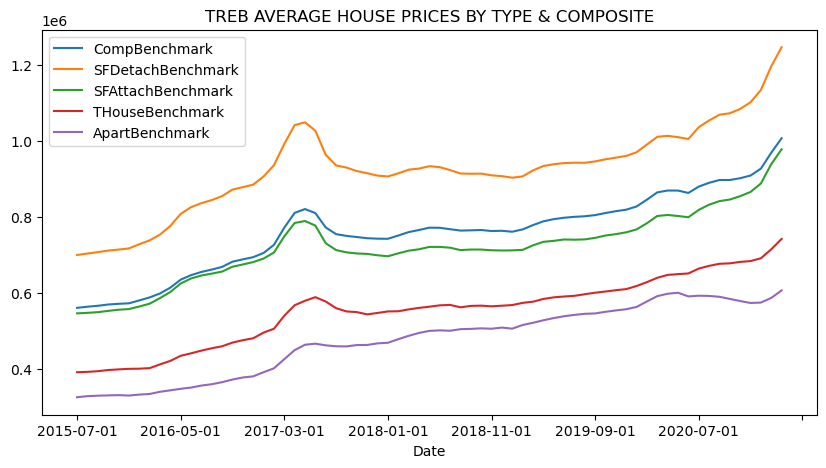

In [19]:
TREB_total_df.plot(x= 'Date', y = np.array(['CompBenchmark', 'SFDetachBenchmark', 'SFAttachBenchmark', 'THouseBenchmark', 'ApartBenchmark']), figsize=(10,5), title = "TREB AVERAGE HOUSE PRICES BY TYPE & COMPOSITE")

In [20]:
mls_data_df = mls_data_df.drop(mls_data_df.loc[mls_data_df['Location'] == 'TREB Total'].index, inplace=False)


In [21]:
mls_data_df.head()

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
69,Ajax,179.8,444300.0,16.00,178.8,478900.0,17.86,187.1,402400.0,15.64,170.5,311600.0,18.16,148.7,252500.0,5.61,2015-07-01
70,Ajax,180.4,445800.0,16.31,179.2,480000.0,15.76,187.6,403500.0,16.81,170.4,311400.0,15.76,151.5,257200.0,8.99,2015-08-01
71,Ajax,182.8,451700.0,15.55,181.4,485800.0,15.10,190.1,408800.0,15.99,172.3,314900.0,14.33,154.3,262000.0,10.53,2015-09-01
72,Ajax,183.8,454200.0,15.74,182.3,488300.0,14.51,191.2,411200.0,15.95,177.1,323700.0,17.13,152.4,258800.0,8.70,2015-10-01
73,Ajax,182.1,450000.0,12.69,180.3,482900.0,11.99,190.3,409300.0,13.14,173.1,316300.0,12.99,151.2,256700.0,5.00,2015-11-01


In [22]:
mls_data_df['Location'].value_counts()

City of Toronto           136
Ajax                       69
Toronto E10                69
Toronto C13                69
Toronto C14                69
Toronto C15                69
Toronto E01                69
Toronto E02                69
Toronto E04                69
Toronto E05                69
Toronto E07                69
Toronto E08                69
Toronto E09                69
Toronto W01                69
Toronto C11                69
Toronto W02                69
Toronto W04                69
Toronto W05                69
Toronto W06                69
Toronto W08                69
Toronto W09                69
Toronto W10                69
Vaughan                    69
Whitby                     69
Aurora                     69
Toronto C12                69
Toronto C10                69
Peel Region                69
Brampton                   69
Clarington                 69
Durham Region              69
Markham                    69
Mississauga                69
Newmarket 

In [23]:
mls_data_df['Date'].value_counts()

2018-05-01    56
2017-12-01    56
2017-06-01    56
2017-07-01    56
2017-08-01    56
              ..
2016-01-01    48
2015-12-01    48
2015-11-01    48
2015-10-01    48
2015-09-01    48
Name: Date, Length: 69, dtype: int64

In [24]:
pd.set_option('display.max_rows', 500)

In [25]:
date_values_df = mls_data_df['Date'].value_counts()

In [26]:
date_values_df.sort_index(ascending=True)

2015-07-01    49
2015-08-01    49
2015-09-01    48
2015-10-01    48
2015-11-01    48
2015-12-01    48
2016-01-01    48
2016-02-01    49
2016-03-01    49
2016-04-01    49
2016-05-01    49
2016-06-01    49
2016-07-01    49
2016-08-01    49
2016-09-01    49
2016-10-01    49
2016-11-01    49
2016-12-01    49
2017-01-01    49
2017-02-01    49
2017-03-01    49
2017-04-01    49
2017-05-01    49
2017-06-01    56
2017-07-01    56
2017-08-01    56
2017-09-01    56
2017-10-01    56
2017-11-01    56
2017-12-01    56
2018-01-01    56
2018-02-01    56
2018-03-01    56
2018-04-01    56
2018-05-01    56
2018-06-01    55
2018-07-01    55
2018-08-01    55
2018-09-01    53
2018-10-01    55
2018-11-01    55
2018-12-01    55
2019-01-01    55
2019-02-01    55
2019-03-01    55
2019-04-01    55
2019-05-01    55
2019-06-01    55
2019-07-01    55
2019-08-01    53
2019-09-01    53
2019-10-01    53
2019-11-01    53
2019-12-01    53
2020-01-01    52
2020-02-01    52
2020-03-01    52
2020-04-01    52
2020-05-01    

In [27]:
##mls_data_df.set_index(['Location'], inplace=True)
##mls_data_df.head()

In [28]:
##mls_data_df.loc['York Region']

In [29]:
##mls_data_df.reset_index()

In [30]:
mls_data_avg_by_date = mls_data_df.groupby('Date').mean()
mls_data_avg_by_date.head()

C:\Users\megaf\AppData\Local\Temp\ipykernel_6876\468459625.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mls_data_avg_by_date = mls_data_df.groupby('Date').mean()


,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange
Date,,,,,,,,,,,,,,,
2015-07-01,182.775510,603316.326531,8.856735,190.214286,795202.040816,9.490612,191.071429,612773.469388,9.446531,173.042857,430524.489796,5.178776,159.371429,333122.448980,5.600816
2015-08-01,183.504082,605193.877551,9.456327,191.014286,797975.510204,10.342245,191.626531,614153.061224,9.910000,174.063265,432814.285714,5.668776,160.222449,335010.204082,6.015102
2015-09-01,184.145833,605043.750000,10.112083,191.904167,801550.000000,11.038333,192.552083,615060.416667,10.343750,179.029167,445393.750000,8.333333,160.627083,335568.750000,6.397708
2015-10-01,185.145833,608852.083333,9.782292,192.656250,805331.250000,10.570625,193.629167,618797.916667,9.934583,180.031250,447560.416667,9.450417,161.062500,336977.083333,6.271458
2015-11-01,186.043750,612627.083333,9.821042,193.433333,810070.833333,10.331667,194.814583,623325.000000,10.049375,180.831250,449685.416667,9.185625,161.562500,338218.750000,6.358542


In [31]:
mls_data_df.columns

Index(['Location', 'CompIndex', 'CompBenchmark', 'CompYoYChange',
       'SFDetachIndex', 'SFDetachBenchmark', 'SFDetachYoYChange',
       'SFAttachIndex', 'SFAttachBenchmark', 'SFAttachYoYChange',
       'THouseIndex', 'THouseBenchmark', 'THouseYoYChange', 'ApartIndex',
       'ApartBenchmark', 'ApartYoYChange', 'Date'],
      dtype='object')

In [32]:
compositeYoY_df = mls_data_df[['CompYoYChange','Date']]
compositeYoY_df.head()

,CompYoYChange,Date
69,16.00,2015-07-01
70,16.31,2015-08-01
71,15.55,2015-09-01
72,15.74,2015-10-01
73,12.69,2015-11-01


In [33]:
mls_data_df['Location'].value_counts()

City of Toronto           136
Ajax                       69
Toronto E10                69
Toronto C13                69
Toronto C14                69
Toronto C15                69
Toronto E01                69
Toronto E02                69
Toronto E04                69
Toronto E05                69
Toronto E07                69
Toronto E08                69
Toronto E09                69
Toronto W01                69
Toronto C11                69
Toronto W02                69
Toronto W04                69
Toronto W05                69
Toronto W06                69
Toronto W08                69
Toronto W09                69
Toronto W10                69
Vaughan                    69
Whitby                     69
Aurora                     69
Toronto C12                69
Toronto C10                69
Peel Region                69
Brampton                   69
Clarington                 69
Durham Region              69
Markham                    69
Mississauga                69
Newmarket 

In [34]:
compositeYoY_df.sort_index()

,CompYoYChange,Date
69,16.00,2015-07-01
70,16.31,2015-08-01
71,15.55,2015-09-01
72,15.74,2015-10-01
73,12.69,2015-11-01
...,...,...
5086,11.76,2020-11-01
5087,12.56,2020-12-01
5088,13.34,2021-01-01
5089,17.16,2021-02-01


In [35]:
mls_data_avg_by_date

,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange
Date,,,,,,,,,,,,,,,
2015-07-01,182.775510,6.033163e+05,8.856735,190.214286,7.952020e+05,9.490612,191.071429,6.127735e+05,9.446531,173.042857,430524.489796,5.178776,159.371429,333122.448980,5.600816
2015-08-01,183.504082,6.051939e+05,9.456327,191.014286,7.979755e+05,10.342245,191.626531,6.141531e+05,9.910000,174.063265,432814.285714,5.668776,160.222449,335010.204082,6.015102
2015-09-01,184.145833,6.050438e+05,10.112083,191.904167,8.015500e+05,11.038333,192.552083,6.150604e+05,10.343750,179.029167,445393.750000,8.333333,160.627083,335568.750000,6.397708
2015-10-01,185.145833,6.088521e+05,9.782292,192.656250,8.053312e+05,10.570625,193.629167,6.187979e+05,9.934583,180.031250,447560.416667,9.450417,161.062500,336977.083333,6.271458
2015-11-01,186.043750,6.126271e+05,9.821042,193.433333,8.100708e+05,10.331667,194.814583,6.233250e+05,10.049375,180.831250,449685.416667,9.185625,161.562500,338218.750000,6.358542
2015-12-01,186.306250,6.130771e+05,9.600000,194.116667,8.111146e+05,10.214583,194.960417,6.230396e+05,9.726667,180.956250,449379.166667,9.530000,161.704167,338072.916667,6.279167
2016-01-01,188.308333,6.203729e+05,10.597500,196.920833,8.242688e+05,11.713333,197.104167,6.288417e+05,10.755000,182.512500,453504.166667,10.140625,161.547917,337231.250000,6.219792
2016-02-01,190.232653,6.224673e+05,10.459592,198.189796,8.206755e+05,11.000000,199.428571,6.329327e+05,10.947347,181.883673,451614.285714,9.722857,163.726531,341285.714286,7.502245
2016-03-01,194.424490,6.357633e+05,11.178367,203.338776,8.423878e+05,11.965714,204.438776,6.485776e+05,12.212449,186.061224,462308.163265,10.879796,165.214286,344769.387755,7.563878


In [36]:
#Convert mls_data_avg_by_date index(date) to datetime (in case it is not)
mls_data_avg_by_date.index = pd.to_datetime(mls_data_avg_by_date.index)

In [37]:
#mls_data_avg_by_date['year']=np.where(mls_data_avg_by_date.index.between('2015-07-01','2016-01-01'), '2015','all_the_rest')

In [38]:
df_2015=mls_data_avg_by_date.loc['2015-07-01':'2016-01-01'].mean()

In [39]:
df_2016=mls_data_avg_by_date.loc['2016-01-01':'2017-01-01'].mean()

In [40]:
df_2017=mls_data_avg_by_date.loc['2017-01-01':'2017-01-01'].mean()

In [41]:
df_2018=mls_data_avg_by_date.loc['2018-01-01':'2018-01-01'].mean()

In [42]:
df_2019=mls_data_avg_by_date.loc['2019-01-01':'2019-01-01'].mean()

In [43]:
df_2020=mls_data_avg_by_date.loc['2020-01-01':'2021-01-01'].mean()

In [44]:
df_2021=mls_data_avg_by_date.loc['2021-01-01':'2022-01-01'].mean()

In [45]:
mls_data_avg_by_year= pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020, df_2021], axis="columns", join = 'inner')

In [46]:
mls_data_avg_by_year

,0,1,2,3,4,5
CompIndex,209.057313,2.256510e+02,2.430732e+02,2.513364e+02,2.882095e+02,3.129339e+02
CompBenchmark,682242.814626,7.322612e+05,7.873286e+05,8.086909e+05,9.193657e+05,9.947138e+05
CompYoYChange,15.372602,2.095367e+01,6.702679e+00,3.269818e+00,1.002679e+01,1.328712e+01
SFDetachIndex,220.936924,2.419735e+02,2.447964e+02,2.466582e+02,2.804626e+02,3.134215e+02
SFDetachBenchmark,914193.828493,1.014143e+06,1.008548e+06,1.014640e+06,1.145352e+06,1.268693e+06
SFDetachYoYChange,16.979409,2.228469e+01,7.767857e-01,7.923636e-01,9.814670e+00,1.703398e+01
SFAttachIndex,220.469551,2.394245e+02,2.411732e+02,2.454727e+02,2.806321e+02,3.149681e+02
SFAttachBenchmark,697034.288331,7.551592e+05,7.450375e+05,7.543945e+05,8.591354e+05,9.548697e+05
SFAttachYoYChange,16.227009,2.097898e+01,7.787500e-01,1.444000e+00,1.043307e+01,1.748852e+01
THouseIndex,199.342877,2.159469e+02,2.440268e+02,2.488200e+02,2.941274e+02,3.159947e+02


In [47]:
mls_data_avg_by_year.columns.values

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [49]:
mls_data_avg_by_year.columns=['2016','2017','2018','2019','2020','2021']

In [50]:
mls_data_avg_by_year

,2016,2017,2018,2019,2020,2021
CompIndex,209.057313,2.256510e+02,2.430732e+02,2.513364e+02,2.882095e+02,3.129339e+02
CompBenchmark,682242.814626,7.322612e+05,7.873286e+05,8.086909e+05,9.193657e+05,9.947138e+05
CompYoYChange,15.372602,2.095367e+01,6.702679e+00,3.269818e+00,1.002679e+01,1.328712e+01
SFDetachIndex,220.936924,2.419735e+02,2.447964e+02,2.466582e+02,2.804626e+02,3.134215e+02
SFDetachBenchmark,914193.828493,1.014143e+06,1.008548e+06,1.014640e+06,1.145352e+06,1.268693e+06
SFDetachYoYChange,16.979409,2.228469e+01,7.767857e-01,7.923636e-01,9.814670e+00,1.703398e+01
SFAttachIndex,220.469551,2.394245e+02,2.411732e+02,2.454727e+02,2.806321e+02,3.149681e+02
SFAttachBenchmark,697034.288331,7.551592e+05,7.450375e+05,7.543945e+05,8.591354e+05,9.548697e+05
SFAttachYoYChange,16.227009,2.097898e+01,7.787500e-01,1.444000e+00,1.043307e+01,1.748852e+01
THouseIndex,199.342877,2.159469e+02,2.440268e+02,2.488200e+02,2.941274e+02,3.159947e+02


In [59]:
#mls_data_avg_by_year

In [51]:
#Inverse Columsn and Rows
mls_data_avg_by_year.T

,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange
2016,209.057313,682242.814626,15.372602,220.936924,9.141938e+05,16.979409,220.469551,697034.288331,16.227009,199.342877,494812.408425,14.810456,175.079667,363720.300235,10.960094
2017,225.651020,732261.224490,20.953673,241.973469,1.014143e+06,22.284694,239.424490,755159.183673,20.978980,215.946939,538336.734694,21.917347,191.024490,394904.081633,18.333469
2018,243.073214,787328.571429,6.702679,244.796429,1.008548e+06,0.776786,241.173214,745037.500000,0.778750,244.026786,581171.428571,9.433393,233.742857,469030.357143,20.705893
2019,251.336364,808690.909091,3.269818,246.658182,1.014640e+06,0.792364,245.472727,754394.545455,1.444000,248.820000,583934.545455,0.218364,249.809091,496520.000000,6.032000
2020,288.209548,919365.699956,10.026787,280.462633,1.145352e+06,9.814670,280.632101,859135.413096,10.433073,294.127419,693516.434293,10.449809,286.323571,575482.322731,9.734638
2021,312.933938,994713.824146,13.287120,313.421495,1.268693e+06,17.033980,314.968122,954869.688001,17.488523,315.994697,739738.414108,13.142050,292.659206,589809.803922,5.889919


In [56]:
mls_data_avg_by_year.index

Index(['CompIndex', 'CompBenchmark', 'CompYoYChange', 'SFDetachIndex',
       'SFDetachBenchmark', 'SFDetachYoYChange', 'SFAttachIndex',
       'SFAttachBenchmark', 'SFAttachYoYChange', 'THouseIndex',
       'THouseBenchmark', 'THouseYoYChange', 'ApartIndex', 'ApartBenchmark',
       'ApartYoYChange'],
      dtype='object')

In [58]:
mls_data_avg_by_year.columns

Index(['2016', '2017', '2018', '2019', '2020', '2021'], dtype='object')

In [59]:
transposed_data=mls_data_avg_by_year.T

In [60]:
transposed_data.columns

Index(['CompIndex', 'CompBenchmark', 'CompYoYChange', 'SFDetachIndex',
       'SFDetachBenchmark', 'SFDetachYoYChange', 'SFAttachIndex',
       'SFAttachBenchmark', 'SFAttachYoYChange', 'THouseIndex',
       'THouseBenchmark', 'THouseYoYChange', 'ApartIndex', 'ApartBenchmark',
       'ApartYoYChange'],
      dtype='object')

In [62]:
transposed_data

,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange
2016,209.057313,682242.814626,15.372602,220.936924,9.141938e+05,16.979409,220.469551,697034.288331,16.227009,199.342877,494812.408425,14.810456,175.079667,363720.300235,10.960094
2017,225.651020,732261.224490,20.953673,241.973469,1.014143e+06,22.284694,239.424490,755159.183673,20.978980,215.946939,538336.734694,21.917347,191.024490,394904.081633,18.333469
2018,243.073214,787328.571429,6.702679,244.796429,1.008548e+06,0.776786,241.173214,745037.500000,0.778750,244.026786,581171.428571,9.433393,233.742857,469030.357143,20.705893
2019,251.336364,808690.909091,3.269818,246.658182,1.014640e+06,0.792364,245.472727,754394.545455,1.444000,248.820000,583934.545455,0.218364,249.809091,496520.000000,6.032000
2020,288.209548,919365.699956,10.026787,280.462633,1.145352e+06,9.814670,280.632101,859135.413096,10.433073,294.127419,693516.434293,10.449809,286.323571,575482.322731,9.734638
2021,312.933938,994713.824146,13.287120,313.421495,1.268693e+06,17.033980,314.968122,954869.688001,17.488523,315.994697,739738.414108,13.142050,292.659206,589809.803922,5.889919


<AxesSubplot:title={'center':'ONTARIO AVERAGE HOUSE PRICES BY TYPE & COMPOSITE FROM 2016 TO 2021; in millions'}>

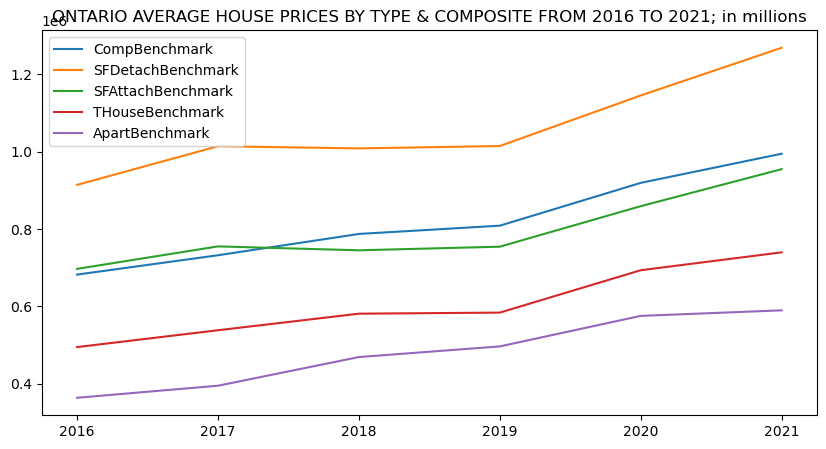

In [67]:
transposed_data.plot(use_index = True, y = np.array(['CompBenchmark', 'SFDetachBenchmark', 'SFAttachBenchmark', 'THouseBenchmark', 'ApartBenchmark']), figsize=(10,5), title = "ONTARIO AVERAGE HOUSE PRICES BY TYPE & COMPOSITE FROM 2016 TO 2021; in millions")